In [8]:
import pandas as pd
import pickle
import numpy as np
data = pickle.load(open('../data/leftppgecg.p','rb'))

In [9]:
data_filtered = data.dropna()

In [10]:
import warnings
warnings.filterwarnings('ignore')
data_filtered['red_rr'] = data['ppg_rr'].apply(lambda x:x[0])
data_filtered['ir_rr'] = data['ppg_rr'].apply(lambda x:x[1])
data_filtered['green_rr'] = data['ppg_rr'].apply(lambda x:x[2])
data_filtered['red_qual'] = data['likelihood'].apply(lambda x:x[0])
data_filtered['ir_qual'] = data['likelihood'].apply(lambda x:x[1])
data_filtered['green_qual'] = data['likelihood'].apply(lambda x:x[2])

In [11]:
columns = ['red','ir','green']
X = []
for c in columns:
    temp = data_filtered[[c+'_rr',c+'_qual','ecg_rr']].values
    X.append(temp)
X = np.concatenate(X,axis=0)

In [18]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


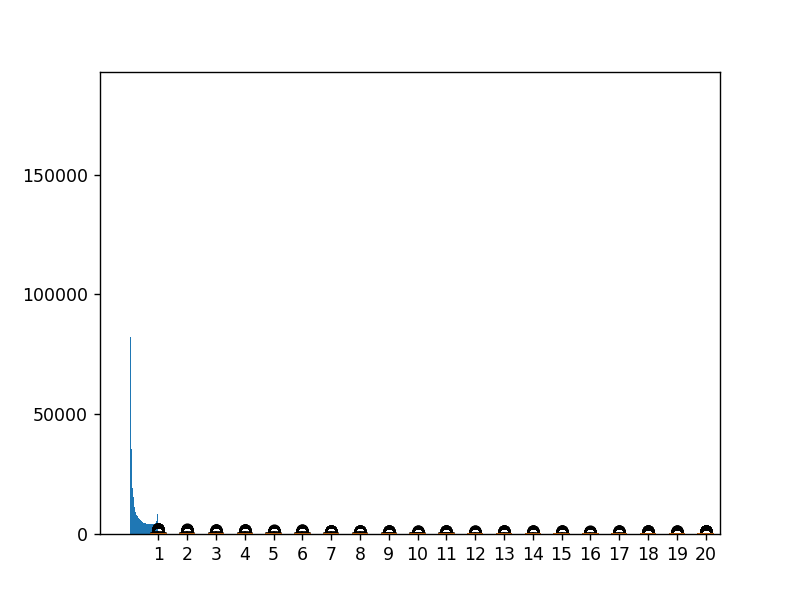

In [21]:
plt.figure()
plt.hist(X[:,1],50)
plt.show()

In [46]:
l_range = np.arange(0,1,.05)
x = []
y = []
for l in l_range:
    index = np.where((X[:,1]>=l)&(X[:,1]<l+.05))[0]
    temp = X[index]
    x.append(str(np.round(l*100)/100)+'-'+str(np.round((l+.05)*100)/100))
    y.append(list(np.abs(temp[:,0]-temp[:,2])))
#     print(np.mean(np.abs(temp[:,0]-temp[:,2])),np.std(np.abs(temp[:,0]-temp[:,2])),len(index))
    

<IPython.core.display.Javascript object>


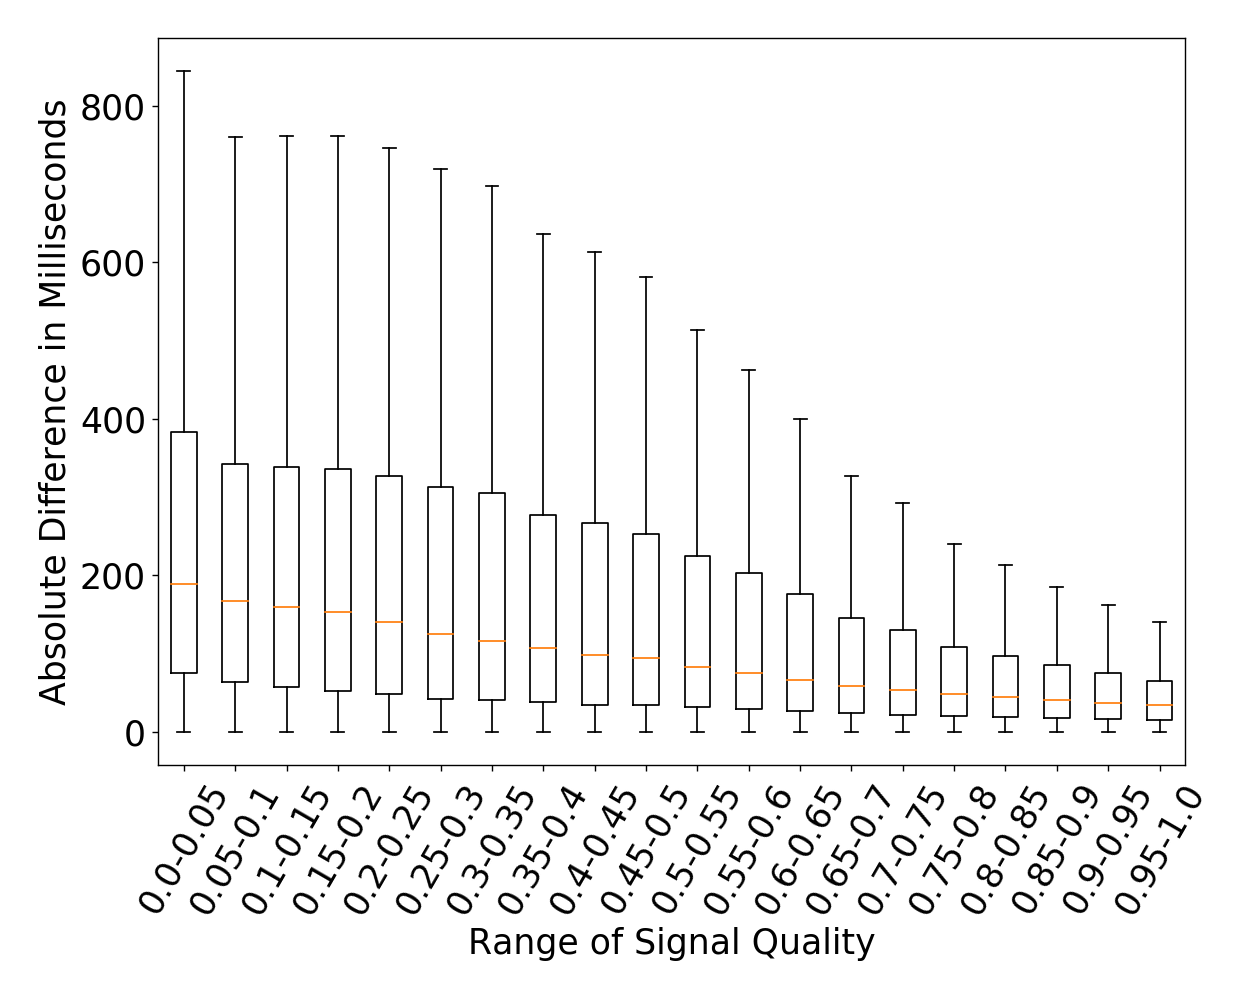

In [47]:
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size':20})
plt.boxplot(y,showfliers=False)
plt.xticks(range(1,len(x)+1),x,rotation=60)
plt.ylabel('Absolute Difference in Milliseconds')
plt.xlabel('Range of Signal Quality')
plt.tight_layout()
plt.show()